**ELO MERCHANT CATEGORY RECOMMENDATION**

**1. Business/ Real-world Problem**


**1.1 What is ELO?**


*   It is one of the biggest and most relaible payment brand in brazil. It planned a reward program to attract the customers. So, the frequency of using their payment brand has increased.



**1.2 What is loyalty Score?**

*   Loyalty is a numerical score calculated 2 months after historical and evaluation period. It acts as a target feature in our training data.



**1.3 Problem statement**


*  Elo merchant category recommendation problem talks about the
customer loyalty of credit cards for their users in elo. In Brazil, it is one
of the biggest and most reliable payment brand. This reward program
is planned by the owners of a company to attract the customers. So,
the frequency of using their payment brand has increased. Basically,
these programs make the customer's choice more strengthen towards
the usage of elo. It is also necessary that policies made by the
companies are known to his customers.Here we have the loyalty score which is numerical score calculated 2 months after historical and evaluation period.



**1.4 Source/Useful Links**


*   Right now, Elo, one of the largest payment brands in Brazil, has built partnerships with merchants in order to offer promotions or discounts to cardholders. But do these promotions work for either the consumer or the merchant? Do customers enjoy their experience? Do merchants see repeat business? Personalization is key.Elo has built machine learning models to understand the most important aspects and preferences in their customers’ lifecycle, from food to shopping. But so far none of them is specifically tailored for an individual or profile. This is where you come in.

https://www.kaggle.com/c/elo-merchant-category-recommendation



**1.5 Real-world/Business objectives and constraints**

1.   Here we predict loyalty score to help the customers and also it is helpful in reducing the unwanted campaign for Elo.
2.   Here we use RMSE(Root-mean-square-error) for reducing the difference between predicted and actual rating(Regression problem).



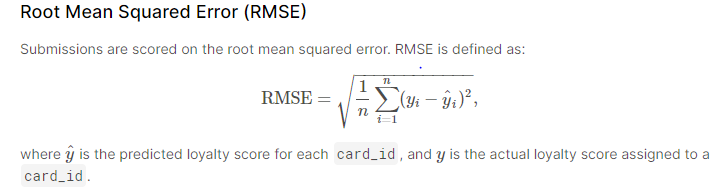

In [ ]:
from IPython.display import Image
Image('/content/Screenshot (249).png')

**1.5. Credits:**


1.   https://medium.com/@blogsupport/elo-merchant-loyalty-recommendation-b28096c882b7

2.   https://medium.com/@narender.buchireddy/elo-merchant-category-recommendation-competition-on-kaggle-lightgbm-implementation-a-case-83b0912fa7f3

3. https://www.kaggle.com/batalov/making-sense-of-elo-data-eda

4. https://www.kaggle.com/roydatascience/elo-stack-with-goss-boosting


**Platform used:**

https://colab.research.google.com/


**2. DATA**

**2.1 Data Overview**

*   Source:kaggle competitions download -c elo-merchant-category-recommendation
*  We have 5 dataset files for this problem.


1.   historical_transactions: Contains upto 3 months woth of transactions for every card at any of the provided merchant_id's
2.   merchant.csv: contains the aggregate information for each merchant_id represented in the dataset.
3. new_merchant_transactions.csv: contains the transactions at new merchants(merchant_ids that this particular card_id has not yet visited) over a period  of two months.
4. train.csv: Contains 6 features, which is first_active_month, card_id, feature_1, feature_2, feature_3 and target.
5. test.csv: Contains the same feature as present in train data but target feature is not present in this dataset.
6. Size of data_file: 2.89 GB

I observed that in all these data we have only categorical and numerical features not text data is present in it.





**2.2 Mapping the real-world problem to a ML problem**

2.2.1. There are certain loyalty scores for each of the card_id representing in train.csv. All of the loyalty scores are real-numbers which declared it as a regression problem.


**3. Exploratory data analysis**

**Import the important modules**

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency,chisquare
from pandas.plotting import scatter_matrix
import plotly.graph_objs as go
import plotly.offline as py
from datetime import datetime, date

**LOAD THE DATA**

In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.122 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,lb;q=0.8,ru;q=0.7,es;q=0.6" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/10445/200747/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1602247933&Signature=dgPxbH8LDGbiOwkQTGyiiBuWZ5FLP0Hc7WCfGLT92w94IcBnO8o6gJCUvO47qzruXIcyyuzLG3bP0QEhYsPDKp2fnNvqOudcb7VQ6mQxLK7MU5v2WGEqr6Std%2Fx6M%2Fkc165mGXg8WgfW5NoEXxQAvvHvABMd%2BS5PV%2BjKcMNKXo7lUBdAVOPGOIkY9DAuUhd2Sw%2BHaIOJPau1iSVwMuZ8PLmRs7wDav9jnjiPO6C4jT3exqLkVrM6n3i%2FC54iawP2ViirD15i7QoZm9QaQPOmLibGg266B40X2%2FLrAwZfi6h6h3OjPEZJSSOb%2Fmu1D0kD4hVbNoKES2fwXmfDv10DIA%3D%3D&response-content-disposition=attachment%3B+filename%3Delo-merchant-category-recommendation.zip" -c -O 'elo-merchant-category-recommendation.zip'

--2020-10-08 14:43:56--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/10445/200747/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1602247933&Signature=dgPxbH8LDGbiOwkQTGyiiBuWZ5FLP0Hc7WCfGLT92w94IcBnO8o6gJCUvO47qzruXIcyyuzLG3bP0QEhYsPDKp2fnNvqOudcb7VQ6mQxLK7MU5v2WGEqr6Std%2Fx6M%2Fkc165mGXg8WgfW5NoEXxQAvvHvABMd%2BS5PV%2BjKcMNKXo7lUBdAVOPGOIkY9DAuUhd2Sw%2BHaIOJPau1iSVwMuZ8PLmRs7wDav9jnjiPO6C4jT3exqLkVrM6n3i%2FC54iawP2ViirD15i7QoZm9QaQPOmLibGg266B40X2%2FLrAwZfi6h6h3OjPEZJSSOb%2Fmu1D0kD4hVbNoKES2fwXmfDv10DIA%3D%3D&response-content-disposition=attachment%3B+filename%3Delo-merchant-category-recommendation.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 644665605 (615M) [application/zip]
Saving to: ‘elo-merchant-cate

**UNZIP ALL THE FILES**

In [ ]:
!unzip elo-merchant-category-recommendation.zip

Archive:  elo-merchant-category-recommendation.zip
  inflating: Data Dictionary.xlsx    
  inflating: Data_Dictionary.xlsx    
  inflating: historical_transactions.csv  
  inflating: merchants.csv           
  inflating: new_merchant_transactions.csv  
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


**REDUCE THE MEMORY USAGE**

In [ ]:
#Reduce the memory usage - Inspired by Panchajanya Banerjee
#determine and apply the smallest data type that can fit the range of values
def memory_reduce(data_frame,verbose=True):
  numerals=['int16','int32','int64','float16','float32','float64']# Here we define the datatypes numerals.
  initial_memory_usage=data_frame.memory_usage().sum()/ 1024**2# here we first calculate the memory usage by each feature and then sum up all the memory usage of all features in dataframe. Then we divide it by 2 power 12. So that memory usage will decrease by the dataframe.
  for k in data_frame.columns:#for each column in each dataframe
    datatype_feature= data_frame[k].dtypes# Here we found out the datatypes of each feature in dataframe.
    if datatype_feature in numerals:# Here we check the feature lies in the category of numerics feature.
      minimum_feature_value= data_frame[k].min()# if the feature is in numerics then first we get the  minimum of that feature.
      maximum_feature_value= data_frame[k].max()# if the feature is in numerics then first we get the  maximum of that feature.
      if str(datatype_feature)[:3]== 'int':#  Here we check that third feature is integer feature or not.
        if minimum_feature_value > np.iinfo(np.int8).min and maximum_feature_value < np.iinfo(np.int8).max:# IF integer values is in the between of c_min and c_max and have the value of int8.means of (-128 to 127).
          data_frame[k]= data_frame[k].astype(np.int8)# here simple we assign the int8 value in his corresponding integer value feature.
        elif minimum_feature_value > np.iinfo(np.int16).min and maximum_feature_value < np.iinfo(np.int16).max:# Here simple we check for the int16 means(-32,768 to 32,767) bit range.
          data_frame[k]= data_frame[k].astype(np.int16)# Here we assign the int16 values.  
        elif minimum_feature_value > np.iinfo(np.int32).min and maximum_feature_value < np.iinfo(np.int32).max:# Here for int32 means(-2,147,483,648 to 2,147,483,647) bit range.
          data_frame[k]= data_frame[k].astype(np.int32)#  Here we assign the int32 values.
        elif minimum_feature_value > np.iinfo(np.int64).min and maximum_feature_value < np.iinfo(np.int64).max:# here we assign the int64 means(-9,223,372,036,854,775,808 to 9,223,372,036,854,775,807) bit range.
          data_frame[k]= data_frame[k].astype(np.int64)# Here we assign the int64 values.
      else:  
        if minimum_feature_value > np.finfo(np.float16).min and maximum_feature_value < np.finfo(np.float16).max:# Otherwise if it is the float16 values range
          data_frame[k]= data_frame[k].astype(np.float16)# assign it corresponding values.
        elif minimum_feature_value > np.finfo(np.float32).min and maximum_feature_value < np.finfo(np.float32).max:# Here we check the min and max range of float 32 values.
          data_frame[k]= data_frame[k].astype(np.float32)# assign the corresponding values.
        else:
          data_frame[k] = data_frame[k].astype(np.float64)# similarly for int64. 
  final_memory_usage= data_frame.memory_usage().sum()/1024**2# Here we again decrease the memory usage of each feature after separating the corresponding bit integer and float values
  if verbose:
    print(' The  decrease in memory usage  {:5.2f}MB to ({:.1f}% reduction)'.format(final_memory_usage,100* (initial_memory_usage-final_memory_usage)/initial_memory_usage))# Here we find out the difference between the memory decrease from the starting and end memory usage.
  return data_frame

**Categorical Correlation**

In [ ]:
# reference: https://stackoverflow.com/questions/48035381/correlation-among-multiple-categorical-variables-pandas 
def correlation_categorical(data_frame):
  data_frame=data_frame.apply(lambda k : pd.factorize(k)[0]+1)# here we get the distinct values in each categorical feature. 
  correlation=pd.DataFrame([chisquare(data_frame[k].values,f_exp=data_frame.values.T,axis=1)[0]for k in data_frame],columns=data_frame.columns, index=data_frame.columns)# Here we get the correlation matrix.
  norm=np.round((correlation-correlation.min())/(correlation.max()-correlation.min()),3)# here we normalize the correlation matrix.
  plt.subplots(figsize=(10,8))
  return sns.heatmap(norm,annot=True)# Here we plot the heatmap of seaborn.
  

**EXPLORE THE XLXS FILES**

In [ ]:
# As our first file is excel file we have to read it with the excel command of pandas.
data_dictionary=pd.read_excel('/content/Data_Dictionary.xlsx')
data_dictionary

,train.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,card_id,Unique card identifier
3,first_active_month,"'YYYY-MM', month of first purchase"
4,feature_1,Anonymized card categorical feature
5,feature_2,Anonymized card categorical feature
6,feature_3,Anonymized card categorical feature
7,target,Loyalty numerical score calculated 2 months af...


**Observation:**

1.   This DataDictionary file have the description of all the features in Description column which were included in the train.csv file.
2.   Zeroth row has nan values which is of no use. Second row have columns which have the description of all the columns in our data and third row tell us about the card_id and third one is about the first_active_month which tell us about the month and year of purchase of products.
3. feature_1, feature_2, feature_3 has categorical value which is in row fourth,fifth,and sixth.
4. last row tells us about the prediction on the basis of these features which is known as target column. or we can say loyalty score which is calculated after the two months.

**1. Explore the historical transactions data file**

In [ ]:
historical_transactions=pd.read_csv('/content/historical_transactions.csv')

**1.1 Reduce the memory usage of historical_transactions**

In [ ]:
%%time
reduce_historical_transaction=memory_reduce(historical_transactions)
# replace the infinity values with nan in our historical_transaction data.
reduce_historical_transaction.replace([-np.inf, np.inf], np.nan, inplace=True)

 The  decrease in memory usage  1749.11MB to (43.7% reduction)
CPU times: user 10.1 s, sys: 170 ms, total: 10.3 s
Wall time: 10.3 s


**1.2 Replace all the Nan values**

**1.2.1 Check all NaN values in all the features.**

In [ ]:
for i in reduce_historical_transaction.columns:
  print('The null value present in {} feature of historical transaction is {}'.format(i,historical_transactions[i].isnull().any()))

The null value present in authorized_flag feature of historical transaction is False
The null value present in card_id feature of historical transaction is False
The null value present in city_id feature of historical transaction is False
The null value present in category_1 feature of historical transaction is False
The null value present in installments feature of historical transaction is False
The null value present in category_3 feature of historical transaction is True
The null value present in merchant_category_id feature of historical transaction is False
The null value present in merchant_id feature of historical transaction is True
The null value present in month_lag feature of historical transaction is False
The null value present in purchase_amount feature of historical transaction is False
The null value present in purchase_date feature of historical transaction is False
The null value present in category_2 feature of historical transaction is True
The null value present i

In [ ]:
k=['category_3','merchant_id','category_2']
for k in reduce_historical_transaction[k]:
  print('The percentage of Nan values in {} is {:4.1f} percent'.format(k,historical_transactions[k].isnull().sum() * 100 / len(historical_transactions[k])))


The percentage of Nan values in category_3 is  0.6 percent
The percentage of Nan values in merchant_id is  0.5 percent
The percentage of Nan values in category_2 is  9.1 percent


In [ ]:
# fill all Nan values corresponding to their features values. so that the Nan values will be removed from the features an training will be better of our model.
reduce_historical_transaction['category_2'].fillna(1,inplace=True)# I put '1' here because it is most occured value in this feature
reduce_historical_transaction['category_3'].fillna('A',inplace=True)# I put 'A' here because of most count value
reduce_historical_transaction['merchant_id'].fillna('M_ID_00a6ca8a8a',inplace=True)# same merchant_id is also been taken on the basis of count.

**1.3 Overview of historical_transaction data**

In [ ]:
print(' The number of rows is {} and columns is {} in the dataset '.format(reduce_historical_transaction.shape[0],reduce_historical_transaction.shape[1]))
print(' The First five rows of the historical transaction is:') 
reduce_historical_transaction.head()

 The number of rows is 29112361 and columns is 14 in the dataset 
 The First five rows of the historical transaction is:


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [ ]:
print(' The datatypes of the features in the historical transactions dataset is:',reduce_historical_transaction.dtypes)
print(' The unique values in the features of the historical transactions is:',reduce_historical_transaction.nunique(dropna=False,axis=0))

 The datatypes of the features in the historical transactions dataset is: authorized_flag          object
card_id                  object
city_id                   int16
category_1               object
installments              int16
category_3               object
merchant_category_id      int16
merchant_id              object
month_lag                  int8
purchase_amount         float32
purchase_date            object
category_2              float16
state_id                   int8
subsector_id               int8
dtype: object
 The unique values in the features of the historical transactions is: authorized_flag                2
card_id                   325540
city_id                      308
category_1                     2
installments                  15
category_3                     3
merchant_category_id         327
merchant_id               326311
month_lag                     14
purchase_amount           215014
purchase_date           16395300
category_2                     

**Observation:**


*   Here every feature is different. let us see what type of feature is this.

1.   There ID type of features are six: card_id, merchant_id, city_id, state_id.
2.   Two integer/counter type feature exist: month_lag, installments
3. numerical type feature is one: purchase_amount.
4. categorical features are four in the historical_transaction data: authorized_flag, category_3, category_1, category_2.



**1.4 Analysis of historical transaction with respect to target feature and number of historical transaction for card.**

In [ ]:
data_train=pd.read_csv('/content/train.csv')
data_test=pd.read_csv('/content/test.csv')
target_feature= 'target'

In [ ]:
%%time
group_data_frame= reduce_historical_transaction.groupby('card_id')
group_data_frame= group_data_frame['purchase_amount'].size().reset_index()
group_data_frame.columns= ['card_id', 'number_of_historical_transactaions']
data_frame_train = pd.merge(data_train,group_data_frame, on='card_id', how='left')
data_frame_test = pd.merge(data_test,group_data_frame, on='card_id', how='left')

CPU times: user 2.41 s, sys: 12.9 ms, total: 2.42 s
Wall time: 2.42 s


**1.4.1 Scatter plot to check the ditsribution regarding to target variable**

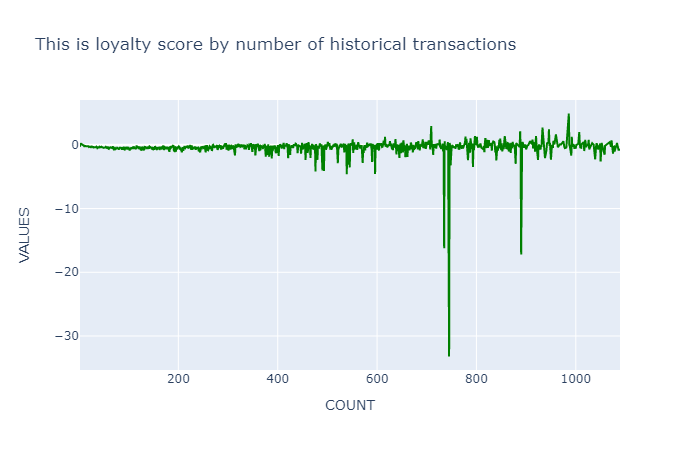

In [4]:
#credit: https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-elo
count_series= data_frame_train.groupby('number_of_historical_transactaions')[target_feature].mean()
count_series = count_series.sort_index()
count_series = count_series[:-60]

def scatt_pl (count_series, color):
  tr= go.Scatter(x=count_series.index[::-1],y=count_series.values[::-1],showlegend= False,marker= dict (color= color,),)
  return tr

tr= scatt_pl(count_series,'green')
#style layout 
layout = go.Layout(
    title="This is loyalty score by number of historical transactions",
    xaxis=dict(
        title="COUNT"
    ),
    yaxis=dict(
        title="VALUES"
    ) ) 

data = [tr]
fig = go.Figure(data=data, layout= layout)
py.iplot(fig, filename= ' hsitorical_transactions')


**Observation:**


*   Here we observed that -33.21928 is the target value which has the maximum count.It means it is most occured target value in comparison to historical_transaction card_id.


*   It means -33.21928 is that target value which is most used in the historical transaction card_id.





**1.4.2 BOXEN PLOT**

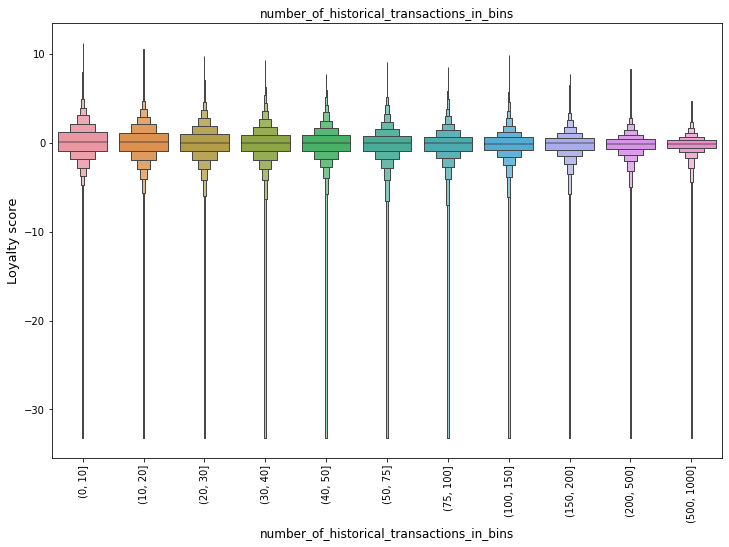

In [ ]:
bins_l= [0, 10, 20, 30, 40, 50, 75, 100, 150, 200, 500, 1000]
data_frame_train['number_of_historical_transactions_in_bins']= pd.cut(data_frame_train['number_of_historical_transactaions'],bins_l)
count_series= data_frame_train.groupby('number_of_historical_transactions_in_bins')[target_feature].mean()
plt.figure(figsize=(12,8))
sns.boxenplot(x='number_of_historical_transactions_in_bins',y=target_feature, data= data_frame_train, showfliers=False)
plt.xticks(rotation='vertical')
plt.xlabel('number_of_historical_transactions_in_bins',fontsize=12)
plt.ylabel('Loyalty score',fontsize=13)
plt.title('number_of_historical_transactions_in_bins')
plt.show()

**Observation:**

* As we seen that we increase the bins size the range of target values is decreasing in historical_transactions.  



**1.4.3 value of historical transaction**

In [ ]:
%%time
group_data_frame= reduce_historical_transaction.groupby('card_id')
group_data_frame= group_data_frame['purchase_amount'].agg(['sum','mean','std','min','max']).reset_index()
group_data_frame.columns= ['card_id', 'sum_historical_transactions','mean_historical_transactions','std_historical_transactions','min_hist_transaction','max_historical_transactions']
data_frame_train = pd.merge(data_train,group_data_frame, on='card_id', how='left')
data_frame_test = pd.merge(data_test,group_data_frame, on='card_id', how='left')

CPU times: user 3.28 s, sys: 28.7 ms, total: 3.31 s
Wall time: 3.31 s


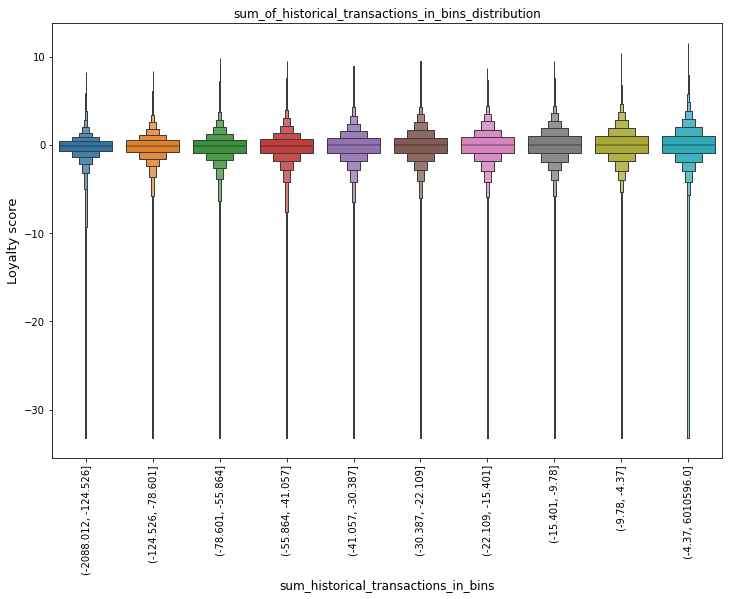

In [ ]:
bins_l= np.percentile(data_frame_train['sum_historical_transactions'],range(0,101,10))
data_frame_train['sum_historical_transactions_in_bins']= pd.cut(data_frame_train['sum_historical_transactions'],bins_l)
#count_series= data_frame_train.groupby('number_of_historical_transactions_in_bins')[target_feature].mean()
plt.figure(figsize=(12,8))
sns.boxenplot(x='sum_historical_transactions_in_bins',y=target_feature, data= data_frame_train, showfliers=False)
plt.xticks(rotation='vertical')
plt.xlabel('sum_historical_transactions_in_bins',fontsize=12)
plt.ylabel('Loyalty score',fontsize=13)
plt.title('sum_of_historical_transactions_in_bins_distribution')
plt.show()

**Observation:**


*   Observations tell us that the loyalty score seems to increase with the 'sum_of_historical_value'. well! this is on the expectation. Let us try the same plot on 'Mean value of historical transaction'.



**1.4.4 Mean of historical transaction value binned distribution**

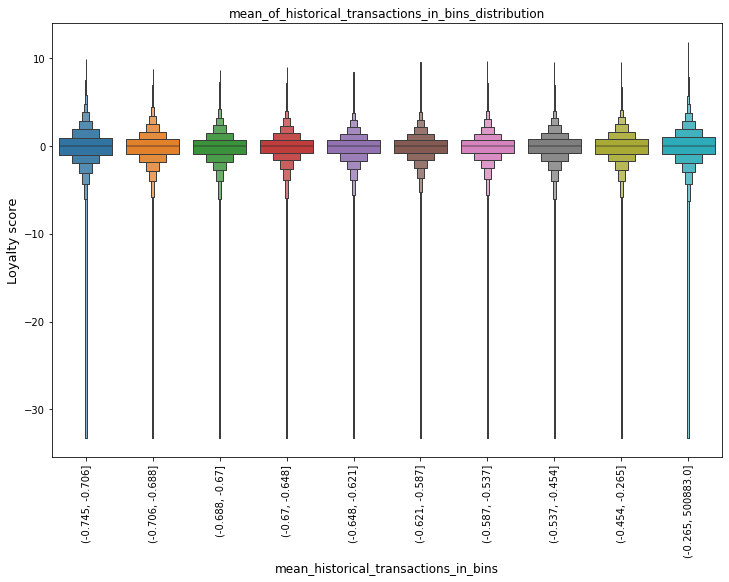

In [ ]:
bins_l= np.percentile(data_frame_train['mean_historical_transactions'],range(0,101,10))
data_frame_train['mean_historical_transactions_in_bins']= pd.cut(data_frame_train['mean_historical_transactions'],bins_l)
#count_series= data_frame_train.groupby('number_of_historical_transactions_in_bins')[target_feature].mean()
plt.figure(figsize=(12,8))
sns.boxenplot(x='mean_historical_transactions_in_bins',y=target_feature, data= data_frame_train, showfliers=False)
plt.xticks(rotation='vertical')
plt.xlabel('mean_historical_transactions_in_bins',fontsize=12)
plt.ylabel('Loyalty score',fontsize=13)
plt.title('mean_of_historical_transactions_in_bins_distribution')
plt.show()

**Observation:**

*   Here we understand that loyaly score first decrease and then increases in mean_binned_historical_transactions.



**1.5 Histogram of all the features in historical_transactions**

In [ ]:
reduce_historical_transaction['purchase_date'] = reduce_historical_transaction['purchase_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

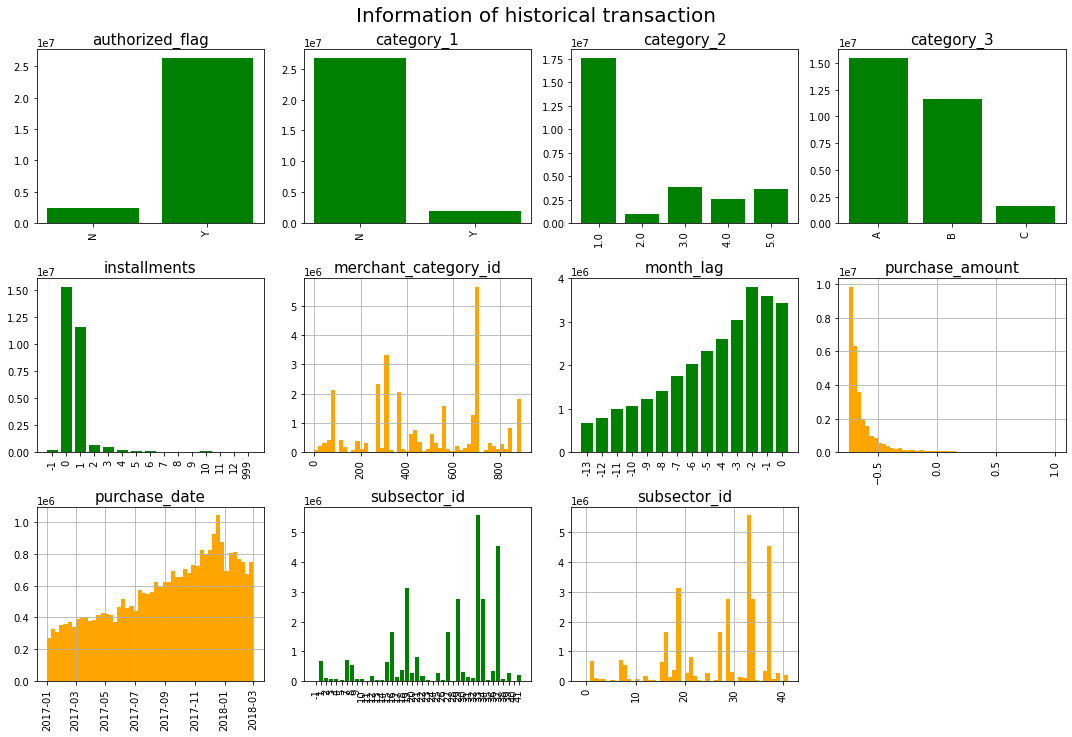

In [ ]:
#credit:https://www.kaggle.com/batalov/making-sense-of-elo-data-eda
# drawing histograms for each column of filtered_trns_history
transaction_filtered = reduce_historical_transaction.loc[reduce_historical_transaction['purchase_amount'] < 1]
category_columns = ['authorized_flag', 'category_1', 'installments','category_3', 'month_lag','category_2', 'subsector_id']
numeral_columns = ['purchase_amount', 'purchase_date', 'merchant_category_id', 'subsector_id']

plt.figure(figsize=[15, 10])
plt.suptitle('Information of historical transaction', y=1.02, fontsize=20)
number_of_columns = 4
number_of_rows = int(np.ceil((len(cat_cols) + len(num_cols))/4))
last_index = 0
for col in sorted(list(transaction_filtered.columns)):
    #print('processing column ' + col)
    if col in category_columns:
        last_index += 1
        plt.subplot(number_of_rows, number_of_columns, last_index)
        value_count = transaction_filtered[col].value_counts()
        x = np.array(value_count.index)
        y = value_count.values
        indexes = np.argsort(x)
        x = x[indexes].astype(str)
        y = y[indexes]
        plt.bar(x, y, color=('green'))
        plt.title(col, fontsize=15)
        plt.xticks(rotation=90)
    if col in numeral_columns:
        last_index += 1
        plt.subplot(number_of_rows, number_of_columns, last_index)
        transaction_filtered[col].hist(bins = 50, color=('orange'))
        plt.title(col, fontsize=15)
        plt.xticks(rotation=90)
    plt.tight_layout()

**Observation:**

1.   In historical_transactions we have a authorized flag feature which tell us about that which transactions is authorized or not.
2.   Installment columns have some diffenrent values which tell us either this column is normalized but some values are not normal.
3. Purchase amount feature seems to be sorted because the bar graph seems to be decreasing.





**1.6 Replace the Text categorical values to numerical values**

In [ ]:
#Here we replace the values of three features in historical transactions which is authorized_flag, category_1, category_3.
transaction_filtered['category_3'].replace({'A':0, 'B':1, 'C':2}, inplace=True)
transaction_filtered['category_1'].replace({'N':0, 'Y':1}, inplace=True)
transaction_filtered['authorized_flag'].replace({'N':0, 'Y':1}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4569: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**1.7 Heatmap for historical_transactions features**

In [ ]:
# reference: https://stackoverflow.com/questions/48035381/correlation-among-multiple-categorical-variables-pandas 
def correlation_categorical(data_frame):
  data_frame=data_frame.apply(lambda k : pd.factorize(k)[0]+1)# here we get the distinct values in each categorical feature. 
  correlation=pd.DataFrame([chisquare(data_frame[k].values,f_exp=data_frame.values.T,axis=1)[0]for k in data_frame],columns=data_frame.columns, index=data_frame.columns)# Here we get the correlation matrix.
  norm=np.round((correlation-correlation.min())/(correlation.max()-correlation.min()),3)# here we normalize the correlation matrix.
  plt.subplots(figsize=(10,8))
  return sns.heatmap(norm,annot=True)# Here we plot the heatmap of seaborn.

In [ ]:
transaction_filtered= transaction_filtered.drop(['card_id','installments','merchant_id','purchase_amount','purchase_date'],axis=1)

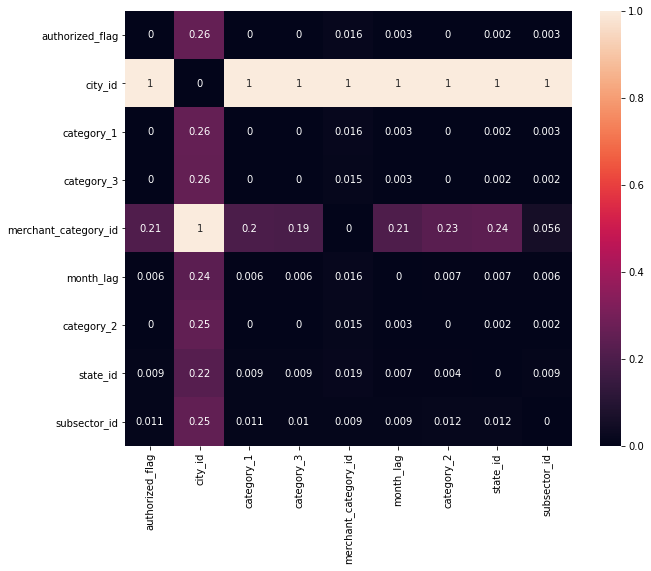

In [ ]:
correlation_categorical(transaction_filtered)

**Observation:**


1.   In historical_transactions city_id is the feature which is highly correlated with all the other features.
2.   Second merchant_category_id is the other feature which is highly correlated with other feature.



**2. Explore the merchant data file.**

In [ ]:
merchant_data=pd.read_csv('/content/merchants.csv')
merchant_data

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,9.666667,3,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,1.750000,3,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,260.000000,2,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,1.666667,3,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,0.500000,3,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334691,M_ID_1f4773aa76,1145,705,33,3.174788,-0.047556,N,A,A,1.00,1.022618,3,0.99,1.019505,6,1.00,1.024796,12,Y,69,9,1.0
334692,M_ID_725a60d404,35,544,29,-0.057471,-0.057471,Y,A,A,0.89,0.927684,3,0.78,0.813473,6,0.59,0.606765,12,Y,-1,-1,NaN
334693,M_ID_f2045dd267,35,561,7,-0.057471,-0.057471,N,A,A,0.96,0.982957,3,0.90,0.924769,6,0.74,0.750763,8,Y,160,21,5.0
334694,M_ID_9139332ccc,35,511,7,-0.057471,-0.057471,Y,A,A,0.94,0.919558,3,0.82,0.783000,6,0.65,0.584000,12,Y,-1,-1,NaN


**2.1 reduce the memory usage of merchant_data**

In [ ]:
%%time
reduce_merchant_data=memory_reduce(merchant_data)
# replace the infinity values with nan in our historical_transaction data.
reduce_merchant_data.replace([-np.inf, np.inf], np.nan, inplace=True)

 The  decrease in memory usage  30.32MB to (46.0% reduction)
CPU times: user 200 ms, sys: 3.12 ms, total: 203 ms
Wall time: 203 ms


**2.2 Check the NAN values in Merchant data files**

In [ ]:
for i in reduce_merchant_data.columns:
  print('The null value present in {} feature of merchant_transaction is {}'.format(i,reduce_merchant_data[i].isnull().any()))

The null value present in merchant_id feature of merchant_transaction is False
The null value present in merchant_group_id feature of merchant_transaction is False
The null value present in merchant_category_id feature of merchant_transaction is False
The null value present in subsector_id feature of merchant_transaction is False
The null value present in numerical_1 feature of merchant_transaction is False
The null value present in numerical_2 feature of merchant_transaction is False
The null value present in category_1 feature of merchant_transaction is False
The null value present in most_recent_sales_range feature of merchant_transaction is False
The null value present in most_recent_purchases_range feature of merchant_transaction is False
The null value present in avg_sales_lag3 feature of merchant_transaction is True
The null value present in avg_purchases_lag3 feature of merchant_transaction is True
The null value present in active_months_lag3 feature of merchant_transaction is 

**2.3 Count the Nan values in the features which have the NaN values.**

In [ ]:
k=['avg_sales_lag3','avg_sales_lag6','avg_sales_lag12','category_2']
for k in reduce_merchant_data[k]:
  print('The percentage of Nan values in {} is {:4.4f} percent'.format(k,reduce_merchant_data[k].isnull().sum() * 100 / len(reduce_merchant_data)))

The percentage of Nan values in avg_sales_lag3 is 0.0039 percent
The percentage of Nan values in avg_sales_lag6 is 0.0039 percent
The percentage of Nan values in avg_sales_lag12 is 0.0039 percent
The percentage of Nan values in category_2 is 3.5516 percent


**2.4 Fill the most occured values in corresponding to NaN values.**

In [ ]:
# fill all Nan values corresponding to their features values. so that the Nan values will be removed from the features an training will be better of our model.
# Here we put 1 values in all features because it is most occured value.
merchant_data['avg_sales_lag3'].fillna(1,inplace=True)
merchant_data['avg_sales_lag6'].fillna(1,inplace=True)
merchant_data['avg_sales_lag12'].fillna(1,inplace=True)
merchant_data['category_2'].fillna(1,inplace=True)

**2.5 Data types of each feature in merchant data**

In [ ]:
# Datatypes of the historical_transaction features 
print(" The datatypes of the merchant data feature is:",merchant_data.dtypes)

 The datatypes of the merchant data feature is: merchant_id                     object
merchant_group_id                int32
merchant_category_id             int16
subsector_id                      int8
numerical_1                    float16
numerical_2                    float16
category_1                      object
most_recent_sales_range         object
most_recent_purchases_range     object
avg_sales_lag3                 float32
avg_purchases_lag3             float64
active_months_lag3                int8
avg_sales_lag6                 float32
avg_purchases_lag6             float64
active_months_lag6                int8
avg_sales_lag12                float32
avg_purchases_lag12            float64
active_months_lag12               int8
category_4                      object
city_id                          int16
state_id                          int8
category_2                     float16
dtype: object


**Observation:**

1.   There are six types of ID features in this merchant_data which is merchant_id, merchant_group_id, merchant_category_id, subsector_id,city_id,state_id.
2.   There are three types of integer/counter:active_months_ag3, active_month_lag6, active_month_lag12.
3. 8 features are numerical type: numerical_1, numerical_2, avg_sales_lag3, avg_purchase_lag3,avg_sales_lag6, average_purchase_lag6, avg_sales_lag12, avg_purchase_lag12.
4. There are five types of categorical value in this merchant_data which is categor_1, most_recent_sales_range, most_recent_purchase_range, category_4.



**2.6 Histogram of all the features in merchant_data**

In [ ]:
# Here several columns have the outliers in the merchant data file and that will squezze most of the values in one bin.
merchants_clean = merchant_data.loc[(merchant_data['numerical_1'] < 0.1) &
                               (merchant_data['numerical_2'] < 0.1) &
                               (merchant_data['avg_sales_lag3'] < 5) &
                               (merchant_data['avg_purchases_lag3'] < 5) &
                               (merchant_data['avg_sales_lag6'] < 10) &
                               (merchant_data['avg_purchases_lag6'] < 10) &
                               (merchant_data['avg_sales_lag12'] < 10) &
                               (merchant_data['avg_purchases_lag12'] < 10)]

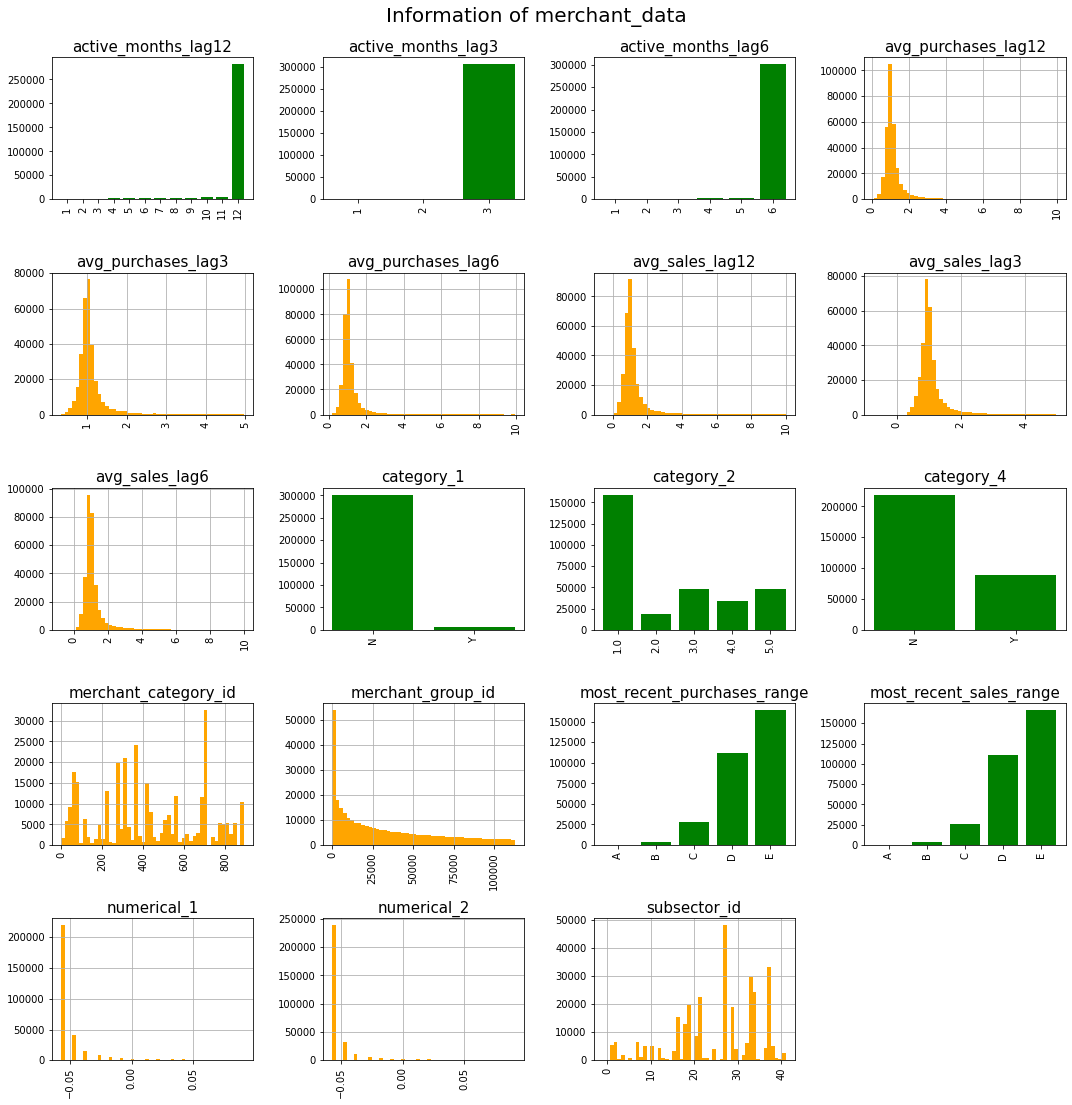

In [ ]:
# drawing histograms for each column of filtered_trns_history
#transaction_filtered = reduce_historical_transaction.loc[reduce_historical_transaction['purchase_amount'] < 1]
category_columns = ['active_months_lag6','active_months_lag3','most_recent_sales_range', 'most_recent_purchases_range','category_1','active_months_lag12','category_4', 'category_2']
numeral_columns = ['numerical_1', 'numerical_2','merchant_group_id','merchant_category_id','avg_sales_lag3', 'avg_purchases_lag3', 'subsector_id', 'avg_sales_lag6', 'avg_purchases_lag6', 'avg_sales_lag12', 'avg_purchases_lag12']

plt.figure(figsize=[15, 15])
plt.suptitle('Information of merchant_data', y=1.02, fontsize=20)
number_of_columns = 4
number_of_rows = int(np.ceil((len(category_columns) + len(numeral_columns))/4))
last_index = 0
for col in sorted(list(clean_merchants.columns)):
    #print('processing column ' + col)
    if col in category_columns:
        last_index += 1
        plt.subplot(number_of_rows, number_of_columns, last_index)
        value_count = clean_merchants[col].value_counts()
        x = np.array(value_count.index)
        y = value_count.values
        indexes = np.argsort(x)
        x = x[indexes].astype(str)
        y = y[indexes]
        plt.bar(x, y, color=('green'))
        plt.title(col, fontsize=15)
        plt.xticks(rotation=90)
    if col in numeral_columns:
        last_index += 1
        plt.subplot(number_of_rows, number_of_columns, last_index)
        clean_merchants[col].hist(bins = 50, color=('orange'))
        plt.title(col, fontsize=15)
        plt.xticks(rotation=90)
    plt.tight_layout()

**Observation:**

1.   Here we found out that merchant_group_id, numerical_1 and numerical_2 are sorted in decreasing order.
2.   In the histogram of purchase range and sales range are sorted in ascending order.
3. numerical_1 and numerical_2 are seems to have the discrete sets of values.



**2.7 Convert the single alphabet values into numerical values**

In [ ]:
merchant_data['category_1'].replace({'N':0, 'Y':1}, inplace=True)
merchant_data['category_4'].replace({'N':0, 'Y':1}, inplace=True)
merchant_data['most_recent_sales_range'].replace({'A':4, 'B':3, 'C':2, 'D':1, 'E':0}, inplace=True)
merchant_data['most_recent_purchases_range'].replace({'A':4, 'B':3, 'C':2, 'D':1, 'E':0}, inplace=True)

In [ ]:
merchant_data_trans=merchant_data.drop(['merchant_id','merchant_group_id','avg_sales_lag3','avg_sales_lag6','avg_sales_lag12','avg_purchases_lag3','avg_purchases_lag6','avg_purchases_lag12'],axis=1)

**2.8 Categorical correlation between the features of merchant data**

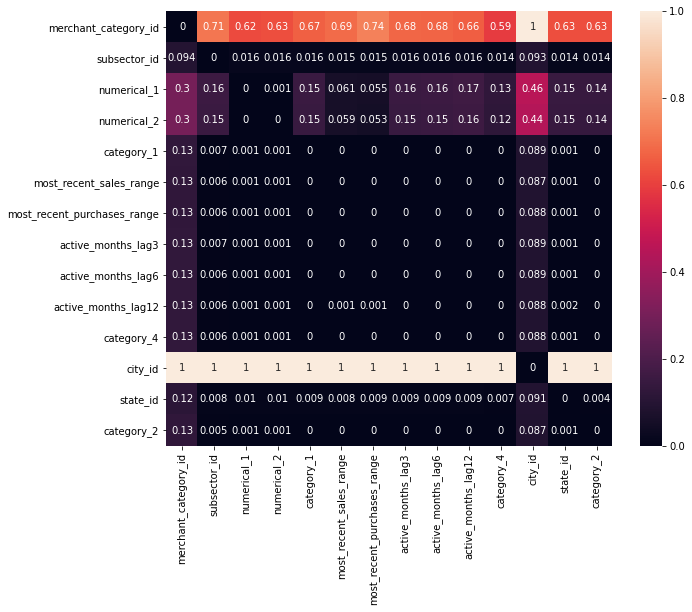

In [ ]:
correlation_categorical(merchant_data_trans)

**Observation:**

1. City-id and merchant_category-id feature values are most correlated in comparison to other features.   
2. Numerical_1 and Numerical_2 features are second most correlated features with other features. 



**2.9 scatter plot of merchant_data**

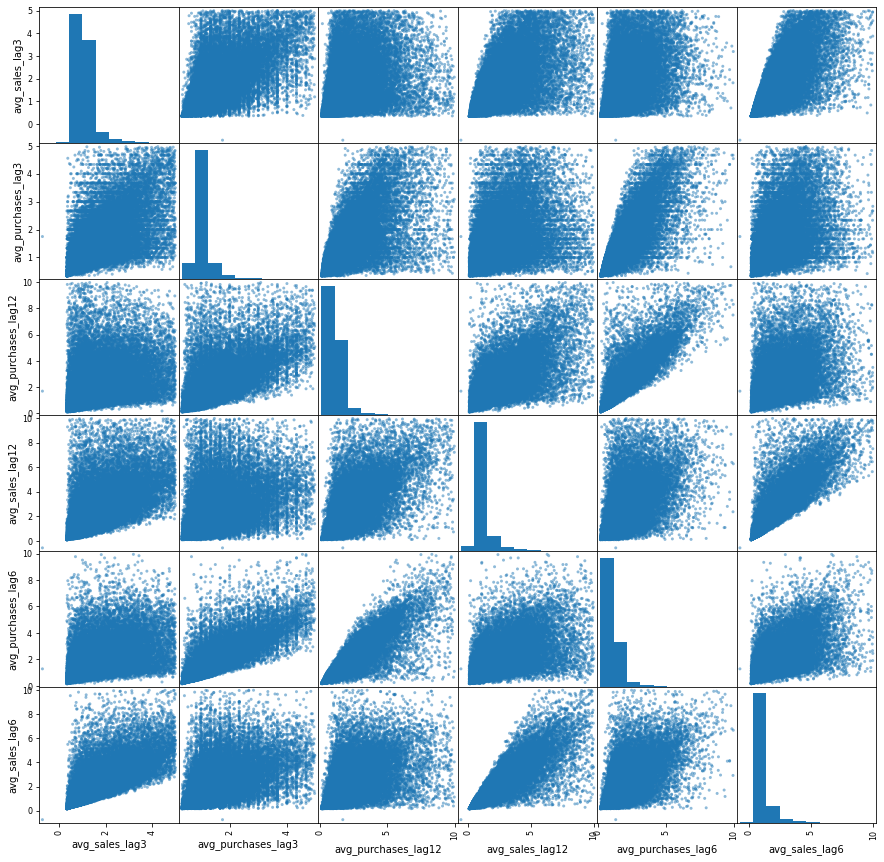

In [ ]:
corrs = np.abs(merchants_clean.corr())
ordered_cols = (corrs).sum().sort_values().index
scatter_matrix(merchants_clean[ordered_cols[-6:]], figsize=[15,15])
plt.show()

**Observation:**

*   Here one thing seems straightforward that average_sales and purchases within the last 3, 6 and 12 months.It seems to increasing after months passes.

*   Let explore this recent months transaction by histogram.





**Histogram plots of sales and purchases to have the sense of transaction productivity.**

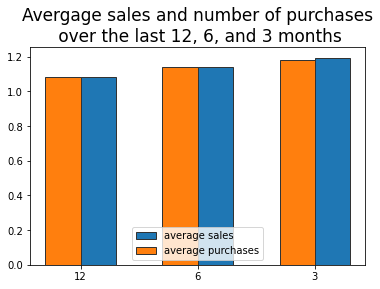

In [ ]:
k = np.array([12, 6, 3]).astype(str)
rates_of_sales = merchants_clean[['avg_sales_lag3', 'avg_sales_lag6', 'avg_sales_lag12']].mean().values
rates_of_purchases = merchants_clean[['avg_purchases_lag3', 'avg_purchases_lag6', 'avg_purchases_lag12']].mean().values
plt.bar(k, rates_of_sales , width=0.3, align='edge', label='average sales', edgecolor=[0.2]*3)
plt.bar(k, rates_of_purchases, width=-0.3, align='edge', label='average purchases', edgecolor=[0.2]*3)
plt.legend()
plt.title('Avergage sales and number of purchases\n over the last 12, 6, and 3 months', fontsize=17)
plt.show()

**Observation:**


*  It clearly shows us that in last three months we have growth in business which seems profitable.



**3. Explore the new_merchant_transaction data file**

In [ ]:
new_merchant_data=pd.read_csv('/content/new_merchant_transactions.csv')
new_merchant_data

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963026,Y,C_ID_1320dee851,142,N,0,A,309,M_ID_7754b67f3b,2,-0.701828,2018-04-06 14:36:52,3.0,19,21
1963027,Y,C_ID_f112aa3381,158,N,0,A,560,M_ID_da063195b7,2,-0.694390,2018-03-07 13:19:18,1.0,15,34
1963028,Y,C_ID_bd97b86450,69,N,1,B,278,M_ID_9a9ccb6544,1,-0.621031,2018-03-05 12:04:56,1.0,9,37
1963029,Y,C_ID_c0513fd84f,130,N,0,A,367,M_ID_40c28d596f,1,-0.656749,2018-03-09 14:47:05,3.0,7,16


**3.1 reduce the memory usage of merchant_data**

In [ ]:
%%time
reduce_new_merchant_data=memory_reduce(new_merchant_data)
# replace the infinity values with nan in our historical_transaction data.
reduce_new_merchant_data.replace([-np.inf, np.inf], np.nan, inplace=True)

 The  decrease in memory usage  114.20MB to (45.5% reduction)
CPU times: user 741 ms, sys: 6.88 ms, total: 747 ms
Wall time: 746 ms


**3.3 Check the NAN values in Merchant data files**

In [ ]:
for i in reduce_new_merchant_data.columns:
  print('The null value present in {} feature of new_merchant_data is {}'.format(i,new_merchant_data[i].isnull().any()))

The null value present in authorized_flag feature of new_merchant_data is False
The null value present in card_id feature of new_merchant_data is False
The null value present in city_id feature of new_merchant_data is False
The null value present in category_1 feature of new_merchant_data is False
The null value present in installments feature of new_merchant_data is False
The null value present in category_3 feature of new_merchant_data is True
The null value present in merchant_category_id feature of new_merchant_data is False
The null value present in merchant_id feature of new_merchant_data is True
The null value present in month_lag feature of new_merchant_data is False
The null value present in purchase_amount feature of new_merchant_data is False
The null value present in purchase_date feature of new_merchant_data is False
The null value present in category_2 feature of new_merchant_data is True
The null value present in state_id feature of new_merchant_data is False
The null va

**3.4 Count the Nan values in the features which have the NaN values**

In [ ]:
k=['category_3','merchant_id','category_2']
for k in reduce_new_merchant_data[k]:
  print('The percentage of Nan values in {} is {:4.1f} percent'.format(k,reduce_new_merchant_data[k].isnull().sum() * 100 / len(reduce_new_merchant_data[k])))

The percentage of Nan values in category_3 is  2.8 percent
The percentage of Nan values in merchant_id is  1.3 percent
The percentage of Nan values in category_2 is  5.7 percent


**3.5 Fill the most occured values in corresponding to NaN values**

In [ ]:
# fill all Nan values corresponding to their features values. so that the Nan values will be removed from the features an training will be better of our model.
# Here we put 1 values in all features because it is most occured value.
reduce_new_merchant_data['category_3'].fillna('A',inplace=True)
reduce_new_merchant_data['merchant_id'].fillna('M_ID_00a6ca8a8a',inplace=True)
reduce_new_merchant_data['category_2'].fillna(1.0,inplace=True)

**3.6 Data types of each feature in merchant data**

In [ ]:
# Datatypes of the historical_transaction features 
print(" The datatypes of the new merchant data feature is:",new_merchant_data.dtypes)

 The datatypes of the new merchant data feature is: authorized_flag          object
card_id                  object
city_id                   int16
category_1               object
installments              int16
category_3               object
merchant_category_id      int16
merchant_id              object
month_lag                  int8
purchase_amount         float16
purchase_date            object
category_2              float16
state_id                   int8
subsector_id               int8
dtype: object


**3.7 Analysis of historical transaction with respect to target feature and number of new_merchant_data for card.**

In [ ]:
%%time
group_data_frame= reduce_new_merchant_data.groupby('card_id')
group_data_frame= group_data_frame['purchase_amount'].size().reset_index()
group_data_frame.columns= ['card_id', 'number_of_new_merchant_transactaions']
data_frame_train = pd.merge(data_train,group_data_frame, on='card_id', how='left')
data_frame_test = pd.merge(data_test,group_data_frame, on='card_id', how='left')

CPU times: user 826 ms, sys: 0 ns, total: 826 ms
Wall time: 826 ms


**3.7.1 Boxen Plot**

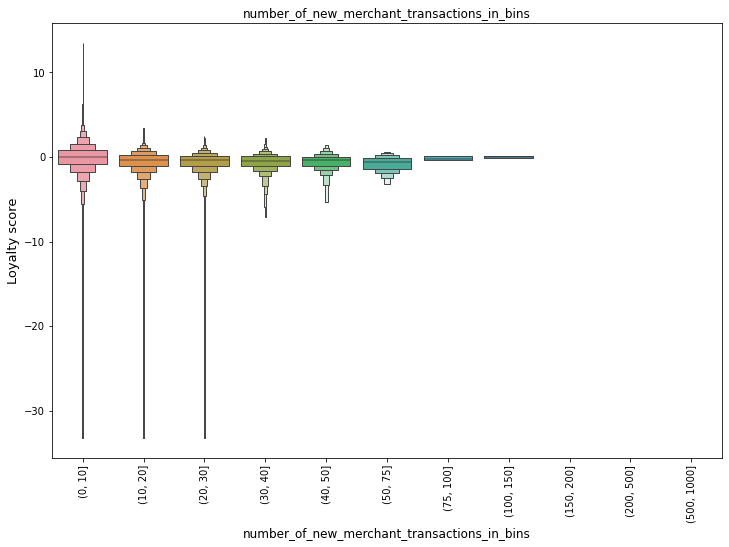

In [ ]:
bins_l= [0, 10, 20, 30, 40, 50, 75, 100, 150, 200, 500, 1000]
data_frame_train['number_of_new_merchant_transactions_in_bins']= pd.cut(data_frame_train['number_of_new_merchant_transactaions'],bins_l)
count_series= data_frame_train.groupby('number_of_new_merchant_transactions_in_bins')[target_feature].mean()
plt.figure(figsize=(12,8))
sns.boxenplot(x='number_of_new_merchant_transactions_in_bins',y=target_feature, data= data_frame_train, showfliers=False)
plt.xticks(rotation='vertical')
plt.xlabel('number_of_new_merchant_transactions_in_bins',fontsize=12)
plt.ylabel('Loyalty score',fontsize=13)
plt.title('number_of_new_merchant_transactions_in_bins')
plt.show()

**Observation:**

*   Here we can observe that as the number of new merchant transactions increases loyalty score to decrease expect for the last bin



**3.7.2 value of new_merchant_transaction**

In [ ]:
group_data_frame= reduce_new_merchant_data.groupby('card_id')
group_data_frame= group_data_frame['purchase_amount'].agg(['sum','mean','std','min','max']).reset_index()
group_data_frame.columns= ['card_id', 'sum_new_merchant_data','mean_new_merchant_data','std__new_merchant_data','min_new_merchant_data','max_new_merchant_data']
data_frame_train = pd.merge(data_train,group_data_frame, on='card_id', how='left')
data_frame_test = pd.merge(data_test,group_data_frame, on='card_id', how='left')

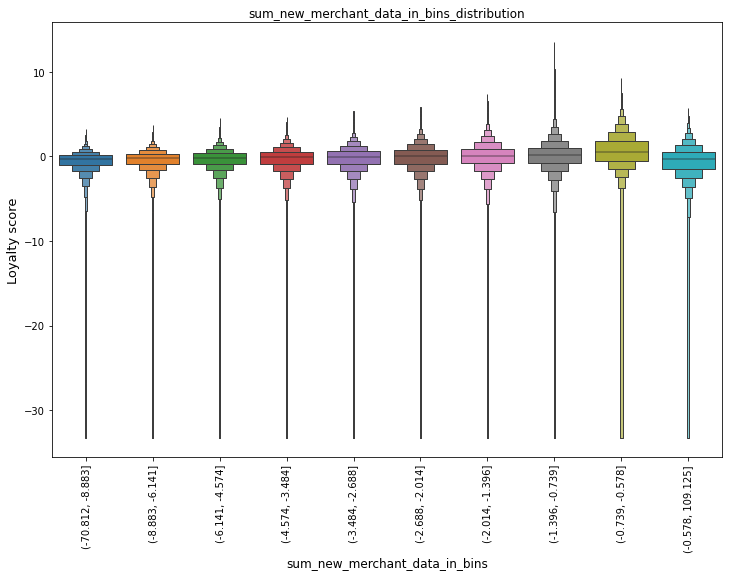

In [ ]:
bins_l= np.nanpercentile(data_frame_train['sum_new_merchant_data'],range(0,101,10))
data_frame_train['sum_new_merchant_data_in_bins']= pd.cut(data_frame_train['sum_new_merchant_data'],bins_l)
#count_series= data_frame_train.groupby('number_of_historical_transactions_in_bins')[target_feature].mean()
plt.figure(figsize=(12,8))
sns.boxenplot(x='sum_new_merchant_data_in_bins',y=target_feature, data= data_frame_train, showfliers=False)
plt.xticks(rotation='vertical')
plt.xlabel('sum_new_merchant_data_in_bins',fontsize=12)
plt.ylabel('Loyalty score',fontsize=13)
plt.title('sum_new_merchant_data_in_bins_distribution')
plt.show()

**Observation:**

*   Here we observe from the violin plots  that the as the sum of new merchant transaction increases the loyalty score also been increasing except for the last bin.


*   This Last bin behaves different of because of some values in of loyalty score which act as outliers which is less than -30.






**3.7.3  Mean of new merchant transaction value binned distribution**

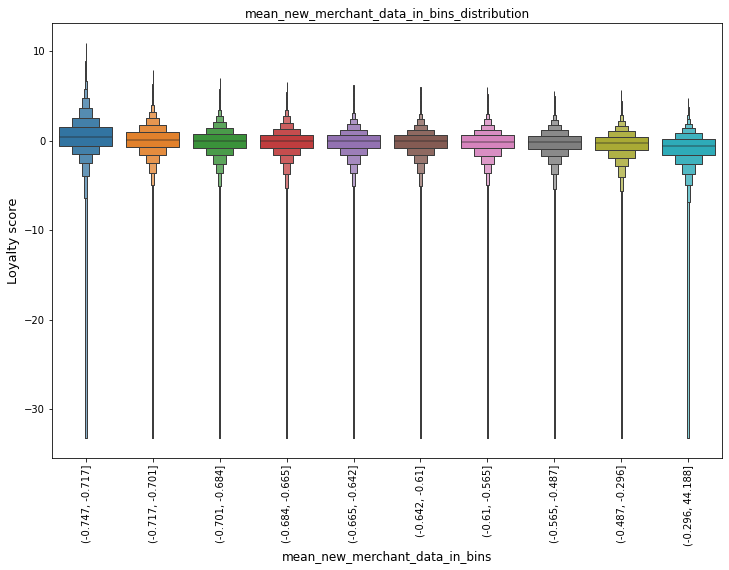

In [ ]:
bins_l= np.nanpercentile(data_frame_train['mean_new_merchant_data'],range(0,101,10))
data_frame_train['mean_new_merchant_data_in_bins']= pd.cut(data_frame_train['mean_new_merchant_data'],bins_l)
#count_series= data_frame_train.groupby('number_of_historical_transactions_in_bins')[target_feature].mean()
plt.figure(figsize=(12,8))
sns.boxenplot(x='mean_new_merchant_data_in_bins',y=target_feature, data= data_frame_train, showfliers=False)
plt.xticks(rotation='vertical')
plt.xlabel('mean_new_merchant_data_in_bins',fontsize=12)
plt.ylabel('Loyalty score',fontsize=13)
plt.title('mean_new_merchant_data_in_bins_distribution')
plt.show()

**Observation:**

*   Same here in mean the loyalty score is decreasing as the transactions is increasing except for the last bin.



 **3.8 Histogram of all the features in new_merchant_transaction**

In [ ]:
from datetime import datetime
reduce_new_merchant_data['purchase_date'] = reduce_new_merchant_data['purchase_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

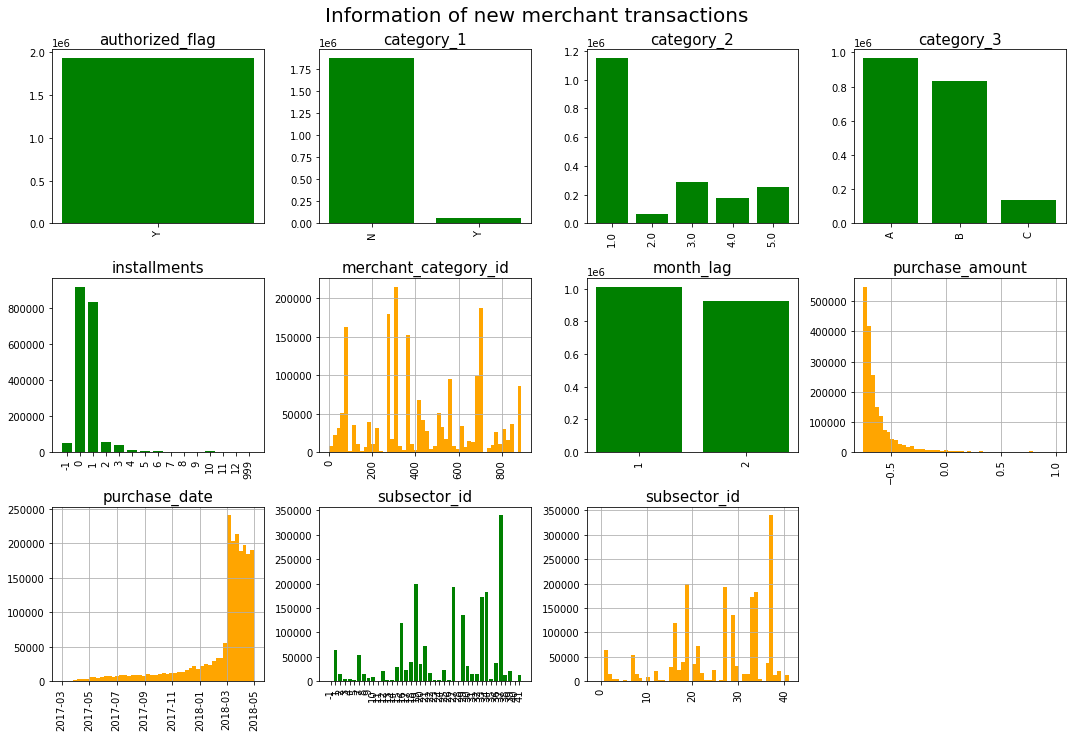

In [ ]:
# drawing histograms for each column of filtered_trns_history
transaction_filtered = reduce_new_merchant_data.loc[reduce_new_merchant_data['purchase_amount'] < 1]
category_columns = ['authorized_flag', 'category_1', 'installments','category_3', 'month_lag','category_2', 'subsector_id']
numeral_columns = ['purchase_amount', 'purchase_date', 'merchant_category_id', 'subsector_id']

plt.figure(figsize=[15, 10])
plt.suptitle('Information of new merchant transactions', y=1.02, fontsize=20)
number_of_columns = 4
number_of_rows = int(np.ceil((len(category_columns) + len(numeral_columns))/4))
last_index = 0
for col in sorted(list(transaction_filtered.columns)):
    #print('processing column ' + col)
    if col in category_columns:
        last_index += 1
        plt.subplot(number_of_rows, number_of_columns, last_index)
        value_count = transaction_filtered[col].value_counts()
        x = np.array(value_count.index)
        y = value_count.values
        indexes = np.argsort(x)
        x = x[indexes].astype(str)
        y = y[indexes]
        plt.bar(x, y, color=('green'))
        plt.title(col, fontsize=15)
        plt.xticks(rotation=90)
    if col in numeral_columns:
        last_index += 1
        plt.subplot(number_of_rows, number_of_columns, last_index)
        transaction_filtered[col].hist(bins = 50, color=('orange'))
        plt.title(col, fontsize=15)
        plt.xticks(rotation=90)
    plt.tight_layout()

**Observation:**

1.   Here we found out that all the transaction are approved so there is no point of having that feature because it has only one type of value.
2.   As we seen in the purchase date feature plot, the reference date is different for card_ids, but most of the transaction are happend in feburary-march 2018 after the refrence date.



**3.8 Convert the single alphabet values into numerical values**

In [ ]:
reduce_new_merchant_data['category_3'].replace({'A':0, 'B':1,'C':2}, inplace=True)
reduce_new_merchant_data['category_1'].replace({'N':0, 'Y':1}, inplace=True)
reduce_new_merchant_data['authorized_flag'].replace({'N':0, 'Y':1}, inplace=True)


In [ ]:
reduce_new_merchant_data=reduce_new_merchant_data.drop(['card_id','merchant_id','purchase_amount','purchase_date'],axis=1)

**3.8 Categorical correlation between the features of merchant data**

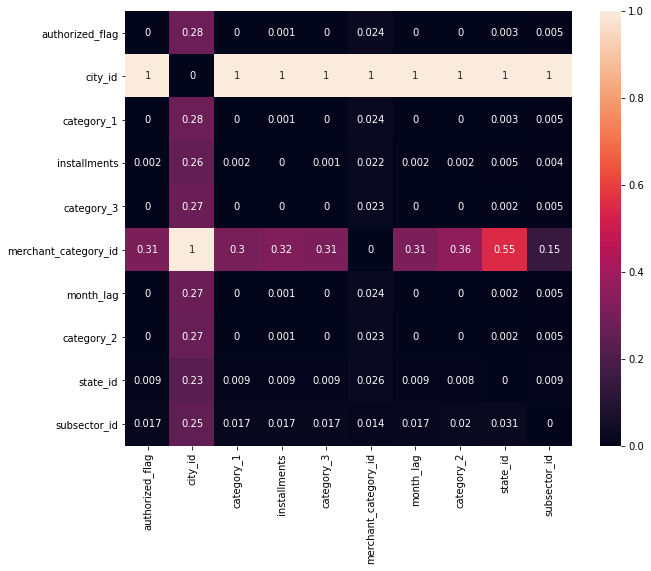

In [ ]:
correlation_categorical(reduce_new_merchant_data)

**Observation:**

1.   City_id and merchant_category_id are highly correlated features.
2.   City_id are the highly correlated values with all the features.
3. mechant_category_id and state_id is the highly correlated value at one point has the score of 0.55. 



**4. Explore the train and test data file**

The number of rows in train_data is: 201917
The number of rows in test_data is: 123623


([<matplotlib.axis.XTick at 0x7f8f5b652da0>,
 [Text(0, 0, 'train_rows'), Text(0, 0, 'test_rows')])

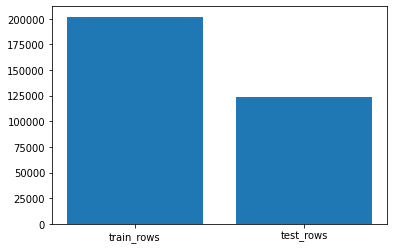

In [ ]:
train_data=pd.read_csv('/content/train.csv')
test_data=pd.read_csv('/content/test.csv')

print('The number of rows in train_data is:',train_data.shape[0])
print('The number of rows in test_data is:',test_data.shape[0])
plt.bar([0,1],[train_data.shape[0],test_data.shape[0]])
plt.xticks([0,1],['train_rows','test_rows'])

**4.1 Feature comparison in train and test data features**

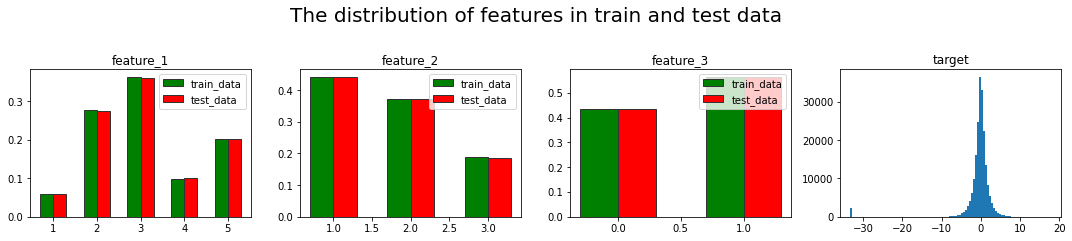

In [ ]:
#https://www.kaggle.com/batalov/making-sense-of-elo-data-eda
plt.figure(figsize=[15,5])
plt.suptitle('The distribution of features in train and test data', fontsize=20, y=1.1)
for n, k in enumerate(['feature_1', 'feature_2', 'feature_3', 'target']):
    plt.subplot(2, 4, n+1)
    if k is not 'target':
        train_bar = train_data[k].value_counts() / train_data.shape[0]
        plt.bar(train_bar.index, train_bar, label=('train_data'), align='edge', width=-0.3, edgecolor=[0.2]*3,color=['green'])
        test_bar = test_data[k].value_counts() / test_data.shape[0]
        plt.bar(test_bar.index, test_bar, label=('test_data'), align='edge', width=0.3, edgecolor=[0.2]*3,color=['red'])
        plt.title(k)
        plt.legend()
    else:
        plt.hist(train_data[k], bins = 100)
        plt.title(k)
    plt.tight_layout()
plt.tight_layout()
plt.show()

**Observation:**

1.   In feature_1, feature_2 and feature_3 train and test data are equally distributed.
2.   But there is anamoly in target features, there is some values which is far from the distribution. It means these are the outlier values.



**4.2 Outliers comparison with the feature of target**

In [ ]:
outliers_in_target= train_data.loc[train_data['target']< -30]
print(' The number of outliers in the data is:',outliers_in_target.shape[0])
non_outliers_in_target= train_data.loc[train_data['target'] >=-30]
print(' The number of non-outliers in the data is:',non_outliers_in_target.shape[0])

 The number of outliers in the data is: 2207
 The number of non-outliers in the data is: 199710


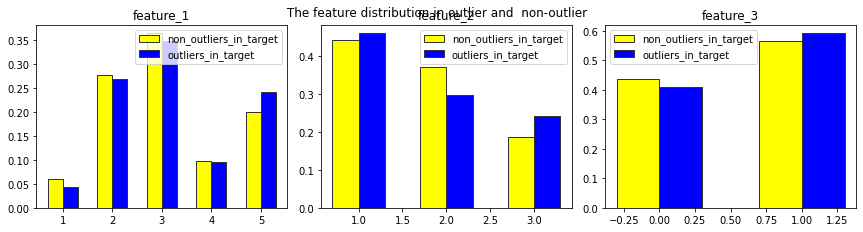

In [ ]:
#https://www.kaggle.com/batalov/making-sense-of-elo-data-eda
plt.figure(figsize=[12,6])
for i,j in enumerate(['feature_1','feature_2','feature_3','target']):
   if j is not 'target':
     plt.subplot(2,3,i+1)
     non_outliers=non_outliers_in_target[j].value_counts() /non_outliers_in_target.shape[0]
     plt.bar(non_outliers.index, non_outliers,label=('non_outliers_in_target'),align='edge',width=-0.3,edgecolor=[0.2]*3,color=['yellow'])
     outliers=outliers_in_target[j].value_counts() /outliers_in_target.shape[0]
     plt.bar(outliers.index, outliers,label=('outliers_in_target'),align='edge',width=0.3,edgecolor=[0.2]*3,color=['blue'])
     plt.title(j)
     plt.legend()
plt.tight_layout()
plt.suptitle(' The feature distribution in outlier and  non-outlier')
plt.show()


**Observation:**

1.  In feature_1, feature_2 and feature_3 difference between outliers and non-outliers are very small. So, It means if we include this values it will definitely be problem for our training. So, It is better to remove this values from our dataset.  




**4.3 Correltaion coefficient for the train and test data features.**

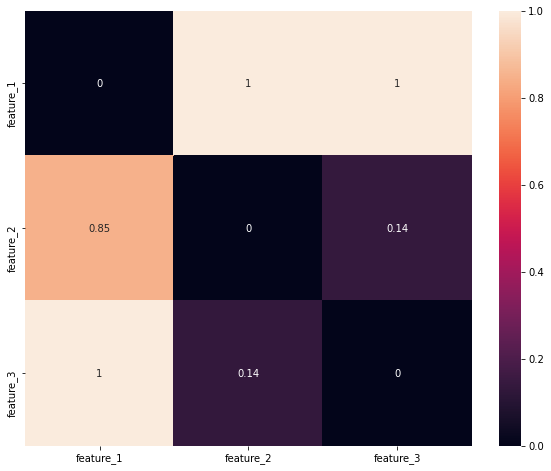

In [ ]:
train_data_corr=train_data.drop(['first_active_month','card_id','target'],axis=1)
correlation_categorical(train_data_corr)

**Observation:**

1.   In  this correlation of features of train data feature_1,feture_3 are correlated. Whereas, feature_1 and feature_2 is also highly correlated with score of 0.85.
  



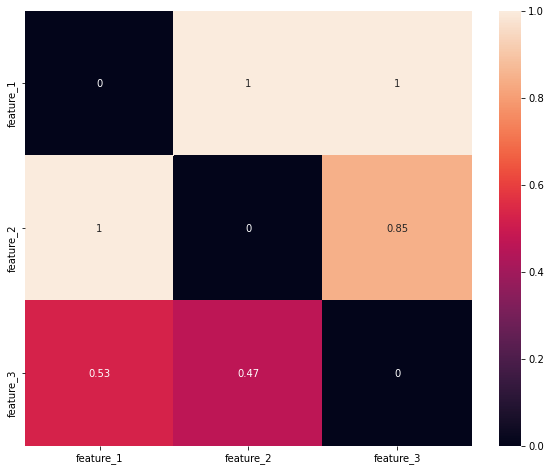

In [ ]:
test_data_corr=test_data.drop(['first_active_month','card_id'],axis=1)
correlation_categorical(test_data_corr)

**Observation:**

1.   Most of the features are pretty well correlated. but feature_1 and feature_2 are the most correlated feature.
2.   Here feature_2 and feature_3 is the second most correlated feature.
3.   In comparison to the train data, here some features are more correlated with each other.



**4.4 violin plot in train data for loyalty score to compare the all the feature with loyalty score**

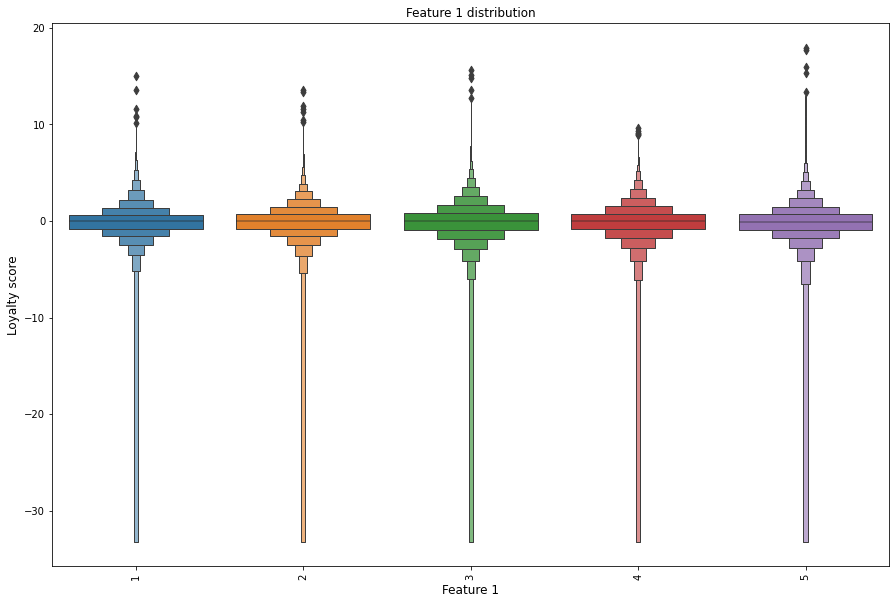

In [ ]:
# feature 1
plt.figure(figsize=(15,10))
sns.boxenplot(x="feature_1", y=target_feature, data=data_train)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Feature 1 distribution")
plt.show()


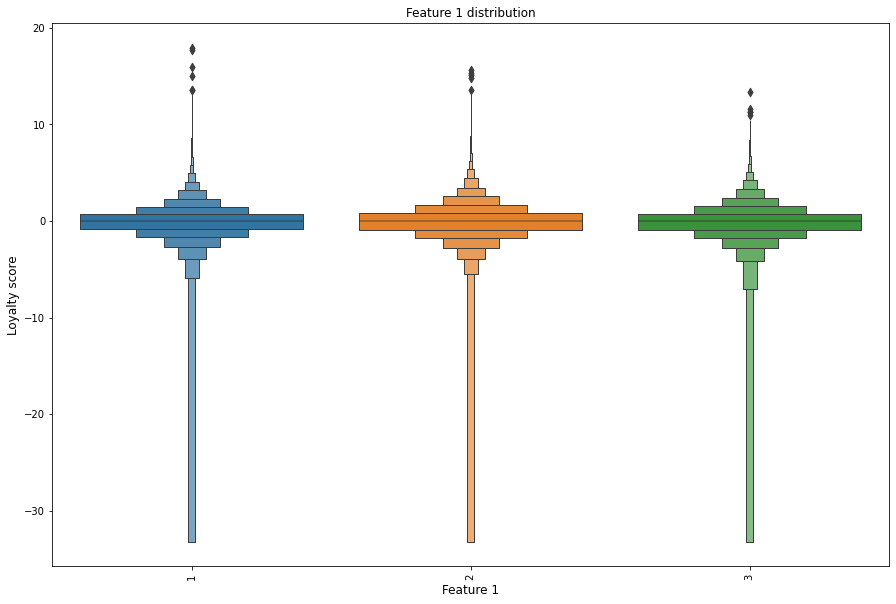

In [ ]:
# feature 1
plt.figure(figsize=(15,10))
sns.boxenplot(x="feature_2", y=target_feature, data=data_train)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Feature 1 distribution")
plt.show()

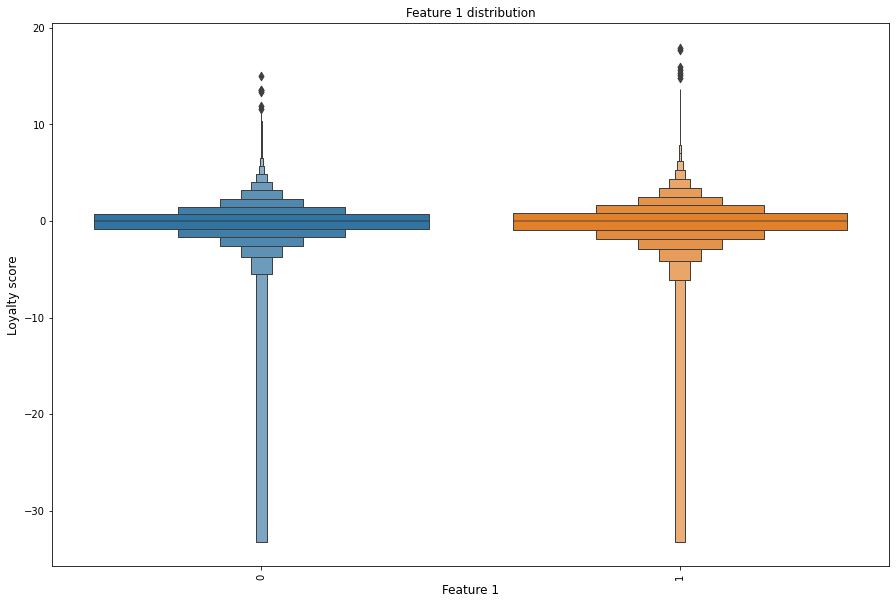

In [ ]:
# feature 1
plt.figure(figsize=(15,10))
sns.boxenplot(x="feature_3", y=target_feature, data=data_train)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Feature 1 distribution")
plt.show()

**Observation:**

1.  With the help of these boxen plots, we dont have the clear idea because for loyalty score all the distribution of feature seems same. I think model does not able to find something here.



**5. Findout the common card_id between these datasets**

In [ ]:
# make function to have the dataframe to know the common values.
def isfound(m,n):
  k=pd.DataFrame(m)
  d=pd.DataFrame(n)
  return(np.mean(k[0].isin(d[0]))*100)

**5.1 historical transaction common values with the rest of values of datasets**

In [ ]:
print('The unique credit cards from historical transactions which is found in new merchant data is {:4.2f}%'.format(isfound(reduce_historical_transaction['card_id'].unique(),reduce_new_merchant_data['card_id'].unique())))
print('The unique merchants from historical transactions which is found in only merchant data is {:4.2f}%'.format(isfound(reduce_historical_transaction['merchant_id'].unique(),merchant_data['merchant_id'].unique())))
print('The unique merchants from new merchant data which is found in only merchant data is {:4.2f}%'.format(isfound(reduce_new_merchant_data['merchant_id'].unique(),merchant_data['merchant_id'].unique())))

The unique credit cards from historical transactions which is found in new merchant data is 89.08%
The unique merchants from historical transactions which is found in only merchant data is 100.00%
The unique merchants from new merchant data which is found in only merchant data is 100.00%


**5.2  train common values with the rest of values of datasets**

In [ ]:
print('The unique credit cards from train data which is found in test is {:4.2f}%'.format(isfound(data_train['card_id'].unique(),data_test['card_id'].unique())))
print('The unique credit cards from train data which is found in only historical transactions data is {:4.2f}%'.format(isfound(data_train['card_id'].unique(),historical_transactions['card_id'].unique())))
print('The unique credit cards from train data which is found in only new merchant data is {:4.2f}%'.format(isfound(data_train['card_id'].unique(),new_merchant_data['card_id'].unique())))

The unique credit cards from train data which is found in test is 0.00%
The unique credit cards from train data which is found in only historical transactions data is 100.00%
The unique credit cards from train data which is found in only new merchant data is 89.14%


**5.3 test common values with the rest of values of datasets**

In [ ]:
print('The unique credit cards from test data which is found in test is {:4.2f}%'.format(isfound(data_test['card_id'].unique(),data_train['card_id'].unique())))
print('The unique credit cards from test data which is found in only historical transactions data is {:4.2f}%'.format(isfound(data_test['card_id'].unique(),historical_transactions['card_id'].unique())))
print('The unique credit cards from test data which is found in only new merchant data is {:4.2f}%'.format(isfound(data_test['card_id'].unique(),new_merchant_data['card_id'].unique())))

The unique credit cards from test data which is found in test is 0.00%
The unique credit cards from test data which is found in only historical transactions data is 100.00%
The unique credit cards from test data which is found in only new merchant data is 88.99%


**Final Observation:**

*   After all this analysis of all these five csv files. We came to know about the various features which is used in transactions fields. Where we monitor the transactions and it is based on various features. So, here we also find out that loyalty scores are been given after the analysis of these features which we have in our train csv file.
*   Loyalty score distribution have some outliers it means some transactions which happened and exist in our train data is having some probelamatic values.


*   We also came to know that in last three months of the transaction here business is in growth. 
*   But this analysis is totally based on each separate csv file. so it is necessary to do featurization on the basis of the importance of these features which is deciding feature for the acceptance of our transactions and also how can we understand our target feature. which clearly represents that it is a regression problem.



